# **Veri OKUMA**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tips-dataset/tipsdataset.csv


In [2]:
ad = pd.read_csv("/kaggle/input/tips-dataset/tipsdataset.csv")

In [15]:
df = ad.copy()

# **Veri Temizleme**

In [16]:
print(df.duplicated().any()) #Burada tekrar eden veri var mı kontrol edilir
df.duplicated().sum()

True


1

In [17]:
df = df.drop_duplicates() #tekrar eden ver silinir
df.duplicated().any()

False

In [18]:
df.head()

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [19]:
print((df["total_bill"]<=0).any()) #aykırı değer varmı kontrol edilir
(df["size"]<=0).any()

False


False

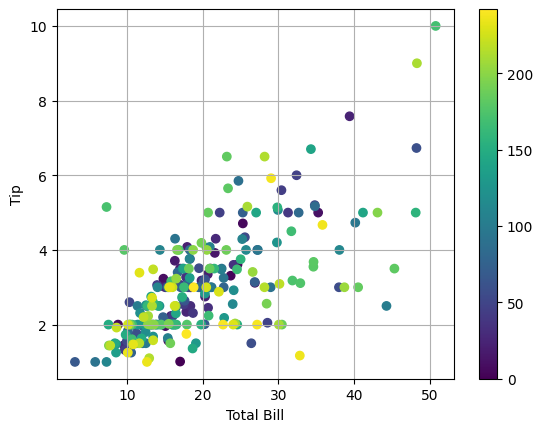

In [68]:
import matplotlib.pyplot as plt
colors = np.arange(len(df))
#toplam hesap ile bahşiş arasındaki ilişkiye bakılır
plt.scatter(df["total_bill"], df["tip"], c=colors, cmap='viridis')
plt.grid()
plt.colorbar()
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

In [21]:
df  = pd.get_dummies(df,columns = ["gender","smoker","day","time"],drop_first = True) #categorical veriler bool dönüştürülür

In [22]:
df.head()

,total_bill,tip,size,gender_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


# **Model Kurma**

In [56]:
#Linear Regression
from sklearn.model_selection import train_test_split
X = df.drop(columns =["tip"],axis =1)
y = df["tip"]

In [57]:
X_train ,X_test,y_train,y_test = train_test_split(
    X,y,test_size = 0.2,random_state = 42)

In [58]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [59]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred = model.predict(X_test)
print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2: 0.5185656337107036
MSE: 1.1730028226689764


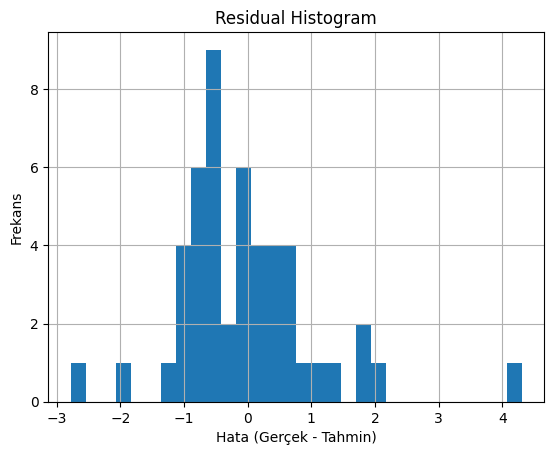

In [60]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred
plt.hist(residuals, bins=30)
plt.xlabel("Hata (Gerçek - Tahmin)")
plt.ylabel("Frekans")
plt.title("Residual Histogram")
plt.grid()
plt.show()

In [61]:
#Random Forest
from sklearn.model_selection import train_test_split
X = df.drop(columns =["tip"],axis =1)
y = df["tip"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(
    n_estimators=50,      
    max_depth=3,          
    min_samples_leaf=3,   
    max_features="sqrt",  
    random_state=42
)

In [63]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, max_features='sqrt', min_samples_leaf=3,
                      n_estimators=50, random_state=42)

In [64]:
y_pred = model.predict(X_test)

In [65]:
from sklearn.metrics import r2_score, mean_squared_error
print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
score = model.score(X_test, y_test)


R²: 0.2916364247060975
MSE: 1.7259101789927813


# **Model Karşılaştırma**

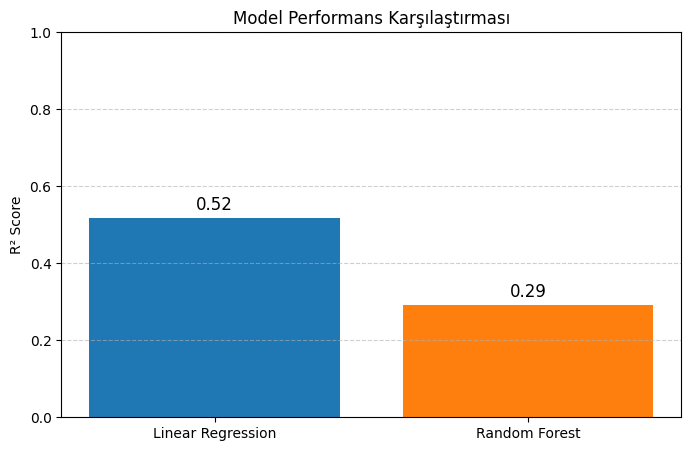

In [70]:
import matplotlib.pyplot as plt
linear_score = 0.5185656337107036      
rf_score = 0.2916364247060975 
models = ["Linear Regression", "Random Forest"]
scores = [linear_score, rf_score]
plt.figure(figsize=(8, 5))
plt.bar(models, scores)
plt.ylabel("R² Score")
plt.title("Model Performans Karşılaştırması")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.bar(models, scores, color=["#1f77b4", "#ff7f0e"])
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center", fontsize=12)
plt.show()